# Problem Statement :

# Fake News Classification with The Help Of Natural Language Processing Technique.

Fake news detection is a hot topic in the field of natural language processing. We consume news through several mediums throughout the day in our daily routine, but sometimes it becomes difficult to decide which one is fake and which one is authentic. Our job is to create a model which predicts whether a given news is real or fake.

In [18]:
# important librries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# set backgroud theme of the visualisation plots

sns.set_theme(context="notebook",style="darkgrid",palette="pastel")

In [4]:
# used to create progress bar 

from tqdm.notebook import tqdm
tqdm.pandas()

In [6]:
fake_df=pd.read_csv("Fake.csv")
real_df=pd.read_csv("True.csv")

In [7]:
fake_df.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


In [8]:
real_df.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [9]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
real_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
# creating new column
fake_df["label"]="Fake"
real_df["label"]="True"

In [12]:
new_df=pd.concat([fake_df,real_df],ignore_index=True)

In [14]:
new_df.tail(4)

,title,text,subject,date,label
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",True


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [16]:
#EDA

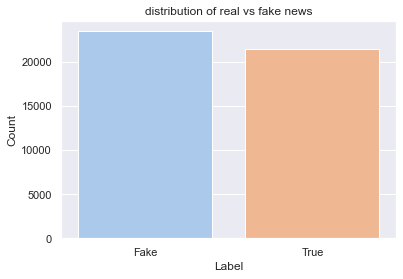

In [20]:
sns.countplot(data=new_df,x="label")
plt.title("distribution of real vs fake news")
plt.xlabel("Label")
plt.ylabel("Count")

plt.show()

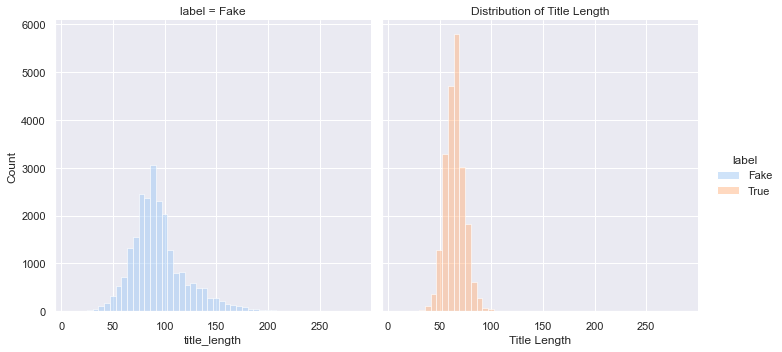

In [22]:
new_df['title_length'] = new_df['title'].str.len()

sns.displot(data=new_df, x='title_length', bins=50, col='label', hue='label')

plt.title('Distribution of Title Length')
plt.xlabel('Title Length')
plt.ylabel('Frequency')

plt.show();

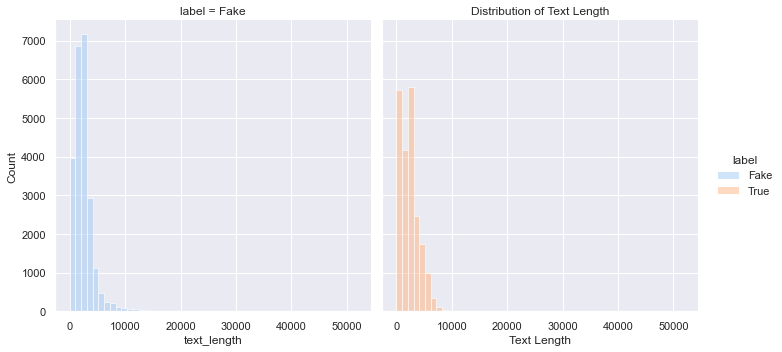

In [23]:
new_df['text_length'] = new_df['text'].str.len()

sns.displot(data=new_df, x='text_length', bins=50, col='label', hue='label')

plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.show()

In [26]:
!pip install wordCloud

In [27]:
!pip install wordcloud

In [40]:
# from wordcloud import WordCloud , STOPWORDS

In [44]:
# def generate_and_plot_wordcloud(text, title,ax):
#     wordcloud=wordCloud(max_words=100,
#                           width=1600,
#                           height=800,
#                           background_color='white',
#                           stopwords=STOPWORDS,
#                           colormap='viridis').generate(text)
#     ax.imshow(wordcloud, interpolation='bilinear')
#     ax.set_title(title, fontsize=18)
#     ax.axis('off')
    

In [45]:
import os

In [47]:
# real_title = ' '.join(new_df.query('label == "Real"')['title'])
# fake_title = ' '.join(new_df.query('label == "Fake"')['title'])

# plt.figure(figsize=(20, 20))

# ax1 = plt.subplot(1, 2, 1)
# generate_and_plot_wordcloud(real_title, 'Real News', ax1)

# ax2 = plt.subplot(1, 2, 2)
# generate_and_plot_wordcloud(fake_title, 'Fake News', ax2)

# plt.suptitle('Word Clouds of Real and Fake News Titles', fontsize=20, y=0.65)

# plt.tight_layout()
# plt.show();

In [48]:
new_df = new_df.drop(['subject','text','date'],axis = 1)
new_df.head()

,title,label,title_length,text_length
0,Donald Trump Sends Out Embarrassing New Year’...,Fake,79,2893
1,Drunk Bragging Trump Staffer Started Russian ...,Fake,69,1898
2,Sheriff David Clarke Becomes An Internet Joke...,Fake,90,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,Fake,78,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Fake,70,2346


In [50]:
new_df = new_df.drop(['title_length','text_length'],axis = 1)
new_df.head()

,title,label
0,Donald Trump Sends Out Embarrassing New Year’...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Fake


In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df["label"]=le.fit_transform(new_df['label'])

In [54]:
new_df.head(2)

,title,label
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0


### data preprocessing

In [66]:

lm = WordNetLemmatizer()
corpus = []
for i in range (len(new_df)):
    review = re.sub('^a-zA-Z0-9',' ', new_df['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [lm.lemmatize(x) for x in review if x not in stopwords]
    review = " ".join(review)
    corpus.append(review)

In [67]:
tf = TfidfVectorizer()
x = tf.fit_transform(corpus).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
y = new_df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [71]:
# creating a function 

In [72]:
# # creating a function 
# def clean(news):
#     # Convert the news article to lowercase
#     news = news.lower()

#     # Remove links
#     news = re.sub(r'https\S+', '', news)

#     # Remove HTML tags
#     news = re.sub(r'<.*?>+', '', news)

#     # Remove special characters
#     news = re.sub(r'[^\w\s]', '', news)

#     # Remove numbers and words containing numbers
#     news = re.sub(r'\w*\d\w*', '', news)

#     # Replace multiple spaces with a single space
#     news = re.sub(r'\s+', ' ', news)

#     return news.strip()

# new_df['clean_title'] = new_df['title'].progress_apply(clean)

# def preprocess(text):
#     # Tokenize the text
#     tokens = word_tokenize(text)

#     # Stem the tokens
#     stemmer = PorterStemmer()
#     stemmed_tokens = [stemmer.stem(token) for token in tokens]

#     # Remove stopwords
#     additional_stop_words = [
#         'fake', 'news', 'false', 'hoax', 'said', 'misinformation',
#         'disinformation', 'rumor', 'unverified', 'not', 'true',
#         'misleading', 'bogus', 'fabricated', 'baseless',
#     ]

#     stop_words = set(stopwords.words('english') + additional_stop_words)
#     filtered_tokens = [token for token in stemmed_tokens if token not in stop_words]

#     # Join the filtered tokens back into a string
#     preprocessed_text = ' '.join(filtered_tokens)

#     return preprocessed_text


# new_df['preprocessed_title'] = new_df['clean_title'].progress_apply(preprocess)

In [76]:
#spliting the data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10, stratify = y )


In [77]:
x_train.shape

(35918, 19578)

In [78]:
x_test.shape

(8980, 19578)

In [79]:
# model building (random forest )

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [80]:
# model evaluation
y_pred = rf.predict(x_test)
accuracy_score_ = accuracy_score(y_test,y_pred) 
accuracy_score_

0.9417594654788418

In [89]:
class Evaluation:
    
    def __init__(self,model,x_train,x_test,y_train,y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
    def train_evaluation(self):
        y_pred_train = self.model.predict(self.x_train)
        
        acc_scr_train = accuracy_score(self.y_train,y_pred_train)
        print("Accuracy Score On Training Data Set :",acc_scr_train)
        print()
        
        con_mat_train = confusion_matrix(self.y_train,y_pred_train)
        print("Confusion Matrix On Training Data Set :\n",con_mat_train)
        print()
        
        class_rep_train = classification_report(self.y_train,y_pred_train)
        print("Classification Report On Training Data Set :\n",class_rep_train)
        
        
    def test_evaluation(self):
        y_pred_test = self.model.predict(self.x_test)
        
        acc_scr_test = accuracy_score(self.y_test,y_pred_test)
        print("Accuracy Score On Testing Data Set :",acc_scr_test)
        print()
        
        con_mat_test = confusion_matrix(self.y_test,y_pred_test)
        print("Confusion Matrix On Testing Data Set :\n",con_mat_test)
        print()
        
        class_rep_test = classification_report(self.y_test,y_pred_test)
        print("Classification Report On Testing Data Set :\n",class_rep_test)

In [90]:
#Checking the accuracy on training dataset

Evaluation(rf,x_train, x_test, y_train, y_test).train_evaluation()

Accuracy Score On Training Data Set : 1.0

Confusion Matrix On Training Data Set :
 [[18785     0]
 [    0 17133]]

Classification Report On Training Data Set :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18785
           1       1.00      1.00      1.00     17133

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918



In [91]:
#Checking the accuracy on testing dataset
Evaluation(rf,x_train, x_test, y_train, y_test).test_evaluation()

Accuracy Score On Testing Data Set : 0.9417594654788418

Confusion Matrix On Testing Data Set :
 [[4407  289]
 [ 234 4050]]

Classification Report On Testing Data Set :
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      4696
           1       0.93      0.95      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



# prediction pipeline

In [92]:
class Preprocessing:
    
    def __init__(self,data):
        self.data = data
        
    def text_preprocessing_user(self):
        lm = WordNetLemmatizer()
        pred_data = [self.data]    
        preprocess_data = []
        for data in pred_data:
            review = re.sub('^a-zA-Z0-9',' ', data)
            review = review.lower()
            review = review.split()
            review = [lm.lemmatize(x) for x in review if x not in stopwords]
            review = " ".join(review)
            preprocess_data.append(review)
        return preprocess_data 

In [93]:
class Prediction:
    
    def __init__(self,pred_data, model):
        self.pred_data = pred_data
        self.model = model
        
    def prediction_model(self):
        preprocess_data = Preprocessing(self.pred_data).text_preprocessing_user()
        data = tf.transform(preprocess_data)
        prediction = self.model.predict(data)
        
        if prediction [0] == 0 :
            return "The News Is Fake"
        
        else:
            return "The News Is Real"

In [94]:
# check the result

In [95]:
data = 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
Prediction(data,rf).prediction_model()

'The News Is Fake'

In [97]:
data=new_df["title"][40488]
Prediction(data,rf).prediction_model()

'The News Is Real'